In [4]:
using DataFrames, CSV, Query, Statistics, Dates, CairoMakie


In [107]:
cd("D:\\Main\\MODELS\\SoilWater_ToolBox\\data\\OUTPUT\\Hypix\\SMAP\\")
Dir = readdir()
println(Dir)

println(monthabbr(1))

["Awatere", "Balclutha", "Cromwell", "Dannevirke", "Darfield", "Dargaville", "Dunedin", "Greymouth", "Hamilton", "Hanmer", "LakeTekapo", "Lauder", "Lincoln", "Martinborough", "Middlemarch", "OTHER", "Paraparaumu", "Ranfurly", "Rangiora", "Reefton", "Stratford", "TABLE_Performance - NIWA.csv", "TABLE_Performance.csv", "Turangi", "Waipawa", "Wallaceville", "Winchmore", "Windsor"]
Jan


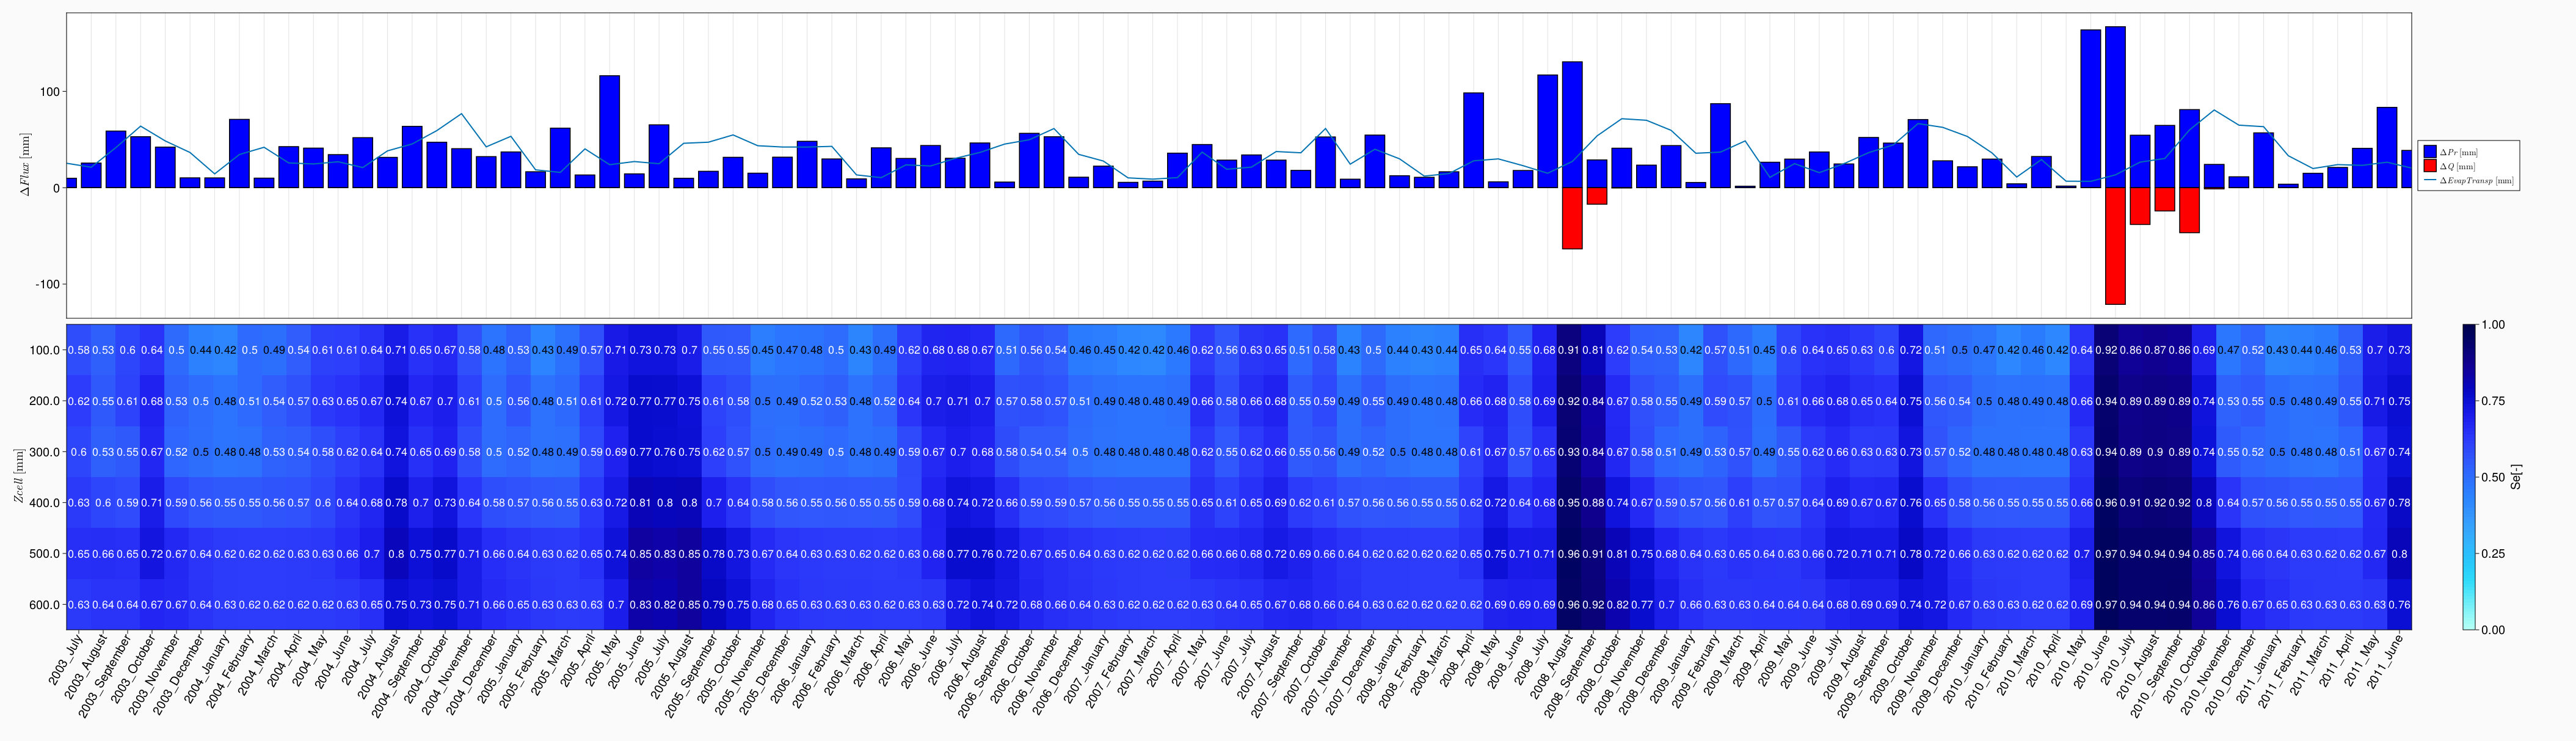

In [108]:

function PLOT_HEATMAP(SiteName, θZₐᵥₑᵣ)
   PathInput₀ = "D:\\Main\\MODELS\\SoilWater_ToolBox\\data\\OUTPUT\\Hypix\\SMAP\\"

   PathInput = PathInput₀ * SiteName * "/Table/" * SiteName * "_Daily_Table_StatisticZaver_YearMonth_1.csv"

   PathOutput = PathInput₀ * SiteName * "/Plots/" * SiteName * "_Heatmap_YearMonth.svg"

   Df = DataFrame(CSV.File(PathInput))

   Df_θZₐᵥₑᵣ =  "Z" .* string.(θZₐᵥₑᵣ) .*"mm" .* "_mean"

   Header_θZₐᵥₑᵣ = string.(θZₐᵥₑᵣ)

   Header_θZₐᵥₑᵣ = reverse(Header_θZₐᵥₑᵣ)

   Nit = length(Df[!,:Year])
   Width = max(Nit * 40, 800)

   HEATMAP(Df, Df_θZₐᵥₑᵣ, Header_θZₐᵥₑᵣ, Nit, PathOutput; Height= 500, Width = Width)
end

function HEATMAP(Df, Df_θZₐᵥₑᵣ, Header_θZₐᵥₑᵣ, Nit, PathOutput; Height=400, Width=1000)

   N_θZₐᵥₑᵣ = length(Df_θZₐᵥₑᵣ)

   Xticks = string.(Df[!,:Year]) .* "_" .* monthname.(Df[!,:Month])

   Fig = Figure(fontsize = 20, backgroundcolor = RGBf(0.98, 0.98, 0.98), font="CMU Serif")

   Ax1 = Axis(Fig[1,1], xticks =(1:Nit, Xticks), ylabel= L"$\Delta Flux$ [mm]", height=Height, width=Width, xgridvisible = true, ygridvisible = false)
      xlims!(Ax1, 1, Nit)

      hidexdecorations!(Ax1, grid=false, ticks=true, ticklabels=true)
      
      Label1 = L"$\Delta Pr$ [mm]"
      barplot!(Ax1, 1:Nit,Df[!,:ΔPrThroughfall_sum], color=:blue, strokecolor=:black, strokewidth=1.5,  label=Label1)

      Label2 = L"$\Delta Q$ [mm]"
      barplot!(Ax1, 1:Nit, - Df[!,:ΔQ_sum], color=:red, strokecolor=:black, strokewidth=1.5,  label=Label2)

      Label3 = L"$\Delta EvapTransp$ [mm]"
      lines!(Ax1, 1:Nit, Df[!,:ΔSink_sum], linewidth=2, colour=:green,  label=Label3)

         Leg = Legend(Fig[1,2], Ax1, framevisible=true, orientation=:horizontal, tellheight=true, tellwidth=true, nbanks=3, labelsize=14)
     
   Yticks = Header_θZₐᵥₑᵣ
   Ax2 = Axis(Fig[3, 1], xticks = (1:Nit, Xticks), yticks = (1:N_θZₐᵥₑᵣ, Yticks), height=Height, width=Width, ylabel= L"$Zcell$ [mm]")
      Ax2.xticklabelrotation = π / 3

      θZₐᵥₑᵣ_2D = Matrix{Float64}(Df[!, Df_θZₐᵥₑᵣ])

      θZₐᵥₑᵣ_2D = reverse(θZₐᵥₑᵣ_2D, dims=2)

      # :deepsea
      Hmap = heatmap!(Ax2, θZₐᵥₑᵣ_2D, colorrange=(0.0, 1.0), colormap = Reverse(:linear_kbc_5_95_c73_n256))

      Colorbar(Fig[3, 2], Hmap; label="Se[-]", width=20, ticks = 0:0.25:1)

   for iT in 1:Nit, iZ in 1:N_θZₐᵥₑᵣ
      txtcolor = θZₐᵥₑᵣ_2D[iT, iZ] > 0.5 ? :white : :black
      text!(Ax2, "$(round(θZₐᵥₑᵣ_2D[iT,iZ], digits = 2))", position = (iT, iZ),
         color = txtcolor, align = (:center, :center), textsize=18)
   end

   Ax2.xticklabelalign = (:right, :center)

   colgap!(Fig.layout, 10)
   rowgap!(Fig.layout, 10)
   resize_to_layout!(Fig)
   trim!(Fig.layout)
   save(PathOutput, Fig) # size = 600 x 450 pt
   display(Fig)

return nothing
end

PLOT_HEATMAP("Awatere", [100.0, 200.0, 300.0, 400.0, 500.0, 600.0])


In [58]:
MonthlyCombine_Data = ["2003_Month_4_6", "2003_Month_7_9", "2003_Month_10_12", "2004_Month_1_3", "2004_Month_4_6", "2004_Month_7_9", "2004_Month_10_12", "2005_Month_1_3", "2005_Month_4_6", "2005_Month_7_9", "2005_Month_10_12", "2006_Month_1_3", "2006_Month_4_6", "2006_Month_7_9", "2006_Month_10_12", "2007_Month_1_3", "2007_Month_4_6", "2007_Month_7_9", "2007_Month_10_12", "2008_Month_1_3", "2008_Month_4_6", "2008_Month_7_9", "2008_Month_10_12", "2009_Month_1_3", "2009_Month_4_6", "2009_Month_7_9", "2009_Month_10_12", "2010_Month_1_3", "2010_Month_4_6", "2010_Month_7_9", "2010_Month_10_12", "2011_Month_1_3", "2011_Month_4_6"]


for iMonthlyCombine in MonthlyCombine_Data
   Year, Month, MonthStart, MonthEnd = split(iMonthlyCombine,"_")
   println(Year," " ,MonthStart)
end


# Year =parse.(Int64, Year)
# Month =parse.(Int64, MonthStart)
# println(Year)
# println(MonthStart)
# typeof(Year)
# i=findfirst("_", A)[1]-1
# Year=A[1:i]
# Month=A[1+11:i+9]
# i=findfirst("__", Month)[1]

# println(i)
# if !( isnothing(i))
# Month = Month[1:i-1]
# end


# println(Month)



zip(["2003_Month_4_6", "2003_Month_7_9", "2003_Month_10_12", "2004_Month_1_3", "2004_Month_4_6", "2004_Month_7_9", "2004_Month_10_12", "2005_Month_1_3", "2005_Month_4_6", "2005_Month_7_9", "2005_Month_10_12", "2006_Month_1_3", "2006_Month_4_6", "2006_Month_7_9", "2006_Month_10_12", "2007_Month_1_3", "2007_Month_4_6", "2007_Month_7_9", "2007_Month_10_12", "2008_Month_1_3", "2008_Month_4_6", "2008_Month_7_9", "2008_Month_10_12", "2009_Month_1_3", "2009_Month_4_6", "2009_Month_7_9", "2009_Month_10_12", "2010_Month_1_3", "2010_Month_4_6", "2010_Month_7_9", "2010_Month_10_12", "2011_Month_1_3", "2011_Month_4_6"])
2003 Month
2003 Month
2003 Month
2004 Month
2004 Month
2004 Month
2004 Month
2005 Month
2005 Month
2005 Month
2005 Month
2006 Month
2006 Month
2006 Month
2006 Month
2007 Month
2007 Month
2007 Month
2007 Month
2008 Month
2008 Month
2008 Month
2008 Month
2009 Month
2009 Month
2009 Month
2009 Month
2010 Month
2010 Month
2010 Month
2010 Month
2011 Month
2011 Month


In [24]:
using Dates

Date=now()
CurrentDate ="_Year" * string(year(Date)) * "_Month" *  string(month(Date)) * "_Day" * string(day(Date)) * "_Hour" * string(hour(Date))

println(CurrentDate)


_Year2022_Month5_Day23_Hour11


In [5]:
println(9^(7-1))
println((9^7)^-1)

531441
2.0907515812876897e-7
